## Step 1 :

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [1]:
# import Data Manipulation Libraries
import numpy as np
import pandas as pd

# import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# import Data Logging Libraries
import logging 
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## Step 2 :

**Data Uploding using Pandas Function**

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/Arbajshaikh7030/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.30
611,277.0,0.0,0.0,191.0,0.0,968.0,856.0,14,21.26
394,405.0,0.0,0.0,175.0,0.0,1120.0,695.0,28,52.30
89,439.0,177.0,0.0,186.0,11.1,884.9,707.9,3,39.30
...,...,...,...,...,...,...,...,...,...
723,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,28,27.83
898,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.86
150,318.8,212.5,0.0,155.7,14.3,852.1,880.4,56,66.10
561,397.0,0.0,0.0,185.7,0.0,1040.6,734.3,28,33.08


## Step 3 :

**Doing Exploratory Data Analysis [EDA] :-->**

1. Univariate Analysis 

2. Bi variate Analysis 

In [3]:
from collections import OrderedDict

stats = []
for i in df.columns: 
    numarical_stats = OrderedDict({
        'feature' :i,
        'type': df[i].dtype,
        'Missing Values': df[i].isnull().sum(),
        'Unique Values': df[i].nunique(),
        'Min': df[i].min,
        'Max': df[i].max,
        'Mode': df[i].mode().values[0],
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'mode': df[i].mode()[0],
        'stander Deviation': df[i].std(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25)
    })

    stats.append(numarical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing Values', 'Unique Values', 'Mean', 'Median', 'Mode', 'Kurtosis', 'IQR'], cmap='Reds')

,feature,type,Missing Values,Unique Values,Min,Max,Mode,Mean,Median,mode,stander Deviation,Kurtosis,IQR
0,cement,float64,0,278,,,362.600000,281.167864,272.900000,362.600000,104.506364,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,,,0.000000,73.895825,22.000000,0.000000,86.279342,-0.508175,142.950000
2,fly_ash,float64,0,156,,,0.000000,54.188350,0.000000,0.000000,63.997004,-1.328746,118.300000
3,water,float64,0,195,,,192.000000,181.567282,185.000000,192.000000,21.354219,0.122082,27.100000
4,superplasticizer,float64,0,111,,,0.000000,6.204660,6.400000,0.000000,5.973841,1.411269,10.200000
5,coarse_aggregate,float64,0,284,,,932.000000,972.918932,968.000000,932.000000,77.753954,-0.599016,97.400000
6,fine_aggregate,float64,0,302,,,594.000000,773.580485,779.500000,594.000000,80.175980,-0.102177,93.050000
7,age,int64,0,14,,,28.000000,45.662136,28.000000,28.000000,63.169912,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,,,33.400000,35.817961,34.445000,33.400000,16.705742,-0.313725,22.425000


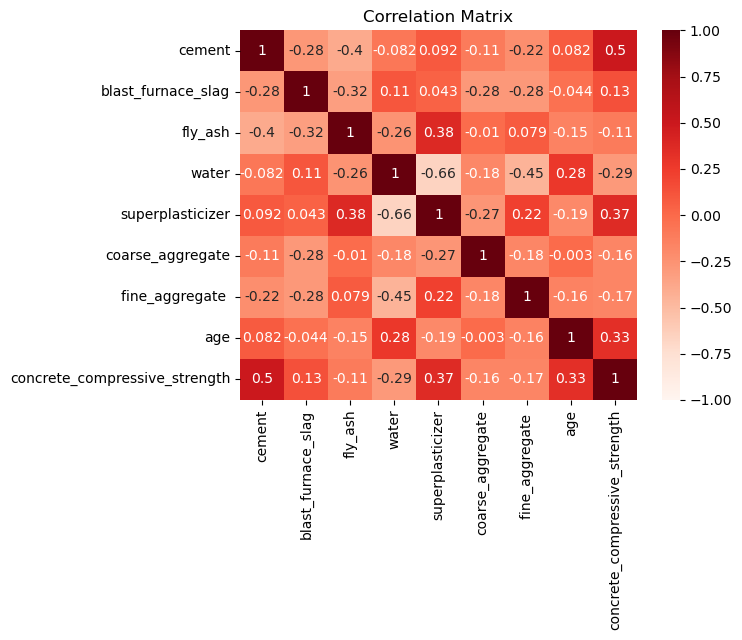

In [4]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---->['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True, yticklabels=True, center=0,vmax=1,vmin=-1, cmap='Reds') 
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Feature and creat New feature Based on Exisiting Feature ----> (Feature Engineerng)

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

### **Featurre Engineering :** 

In [6]:
df['Composite_Ratio'] = 1/ (df['cement'] + df['blast_furnace_slag'] + df['superplasticizer'])/(df['water'])

In [7]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.373830
Name: concrete_compressive_strength, dtype: float64

In [8]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.000011
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.000011
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.000009
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.000009
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.000016
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.000014
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.000015
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.000018
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.000016


In [9]:
df['cement_to_water_ratio'] = 1/ (df['cement'])/(df['water'])

In [10]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio,cement_to_water_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.000011,0.000011
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.000011,0.000011
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.000009,0.000013
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.000009,0.000013
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.000016,0.000026
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.000014,0.000020
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.000015,0.000016
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.000018,0.000035
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.000016,0.000036


In [11]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.373830
cement_to_water_ratio           -0.381603
Name: concrete_compressive_strength, dtype: float64

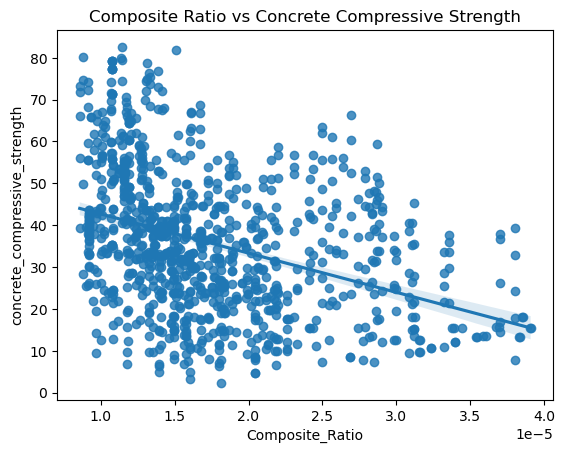

In [12]:
sns.regplot(x=df['Composite_Ratio'], y=df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

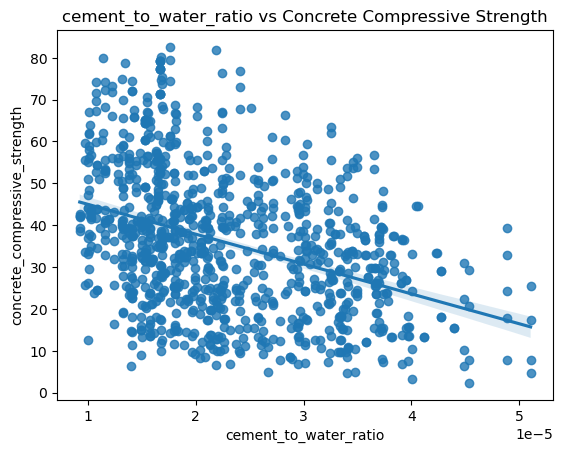

In [13]:
sns.regplot(x=df['cement_to_water_ratio'], y=df['concrete_compressive_strength'])
plt.title('cement_to_water_ratio vs Concrete Compressive Strength')
plt.show()

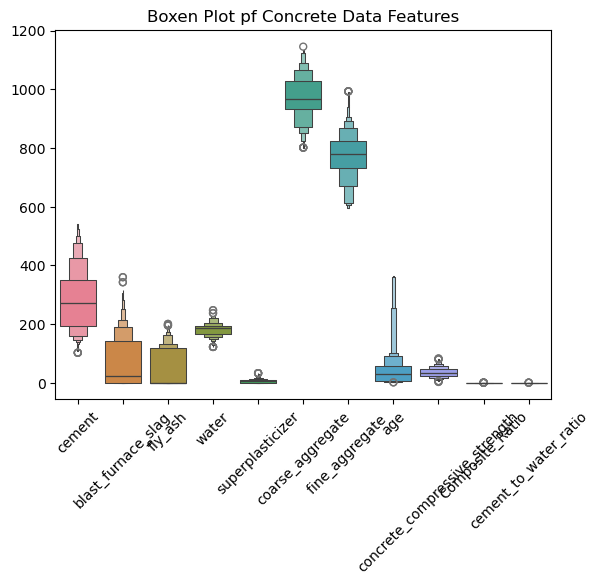

In [27]:
plt.Figure(figsize=(12, 6))
sns.boxenplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxen Plot pf Concrete Data Features')
plt.show()

In [14]:
# Using Variance Inflation Factor (VIF) to Identify Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns=['concrete_compressive_strength'])   # All Independant Variable
x = x.assign(constant=1)

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Drop the constant column from the result
vif_data = vif_data[vif_data["feature"]!= "constant"]

# Display VIF values
print(vif_data)

                 feature        VIF
0                 cement  17.538853
1     blast_furnace_slag  11.364676
2                fly_ash   6.245986
3                  water   9.126844
4       superplasticizer   3.017690
5       coarse_aggregate   5.192764
6        fine_aggregate    7.144424
7                    age   1.128654
8        Composite_Ratio  10.629273
9  cement_to_water_ratio   8.501630


## **Data Insights:**

1. Higher Values of VIF Suggest Multi Colinearity. [VIF > 10] ---> Column Shows Multicollinearity.

2. Such Column Must Be Removed Before Applying Any Regression Model.

### Step 4 :

Spliting the dataset into training set and test set also Using Train And Test Split To Prevent Data Leakage.


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('concrete_compressive_strength', axis=1)

y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Using Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.6061044311281715

In [29]:
# Dicision Tree Regrassior
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

r2_score_DT = r2_score(y_test, y_pred_DT)

print(f'R2 Score for Decision Tree Regressor: {r2_score_DT * 100} %')


R2 Score for Decision Tree Regressor: 83.45201811243552 %


In [30]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

r2_score_RF = r2_score(y_test, y_pred_RF)



print(f'R2 Score for Random Forest Regressor: {r2_score_RF * 100} %')

R2 Score for Random Forest Regressor: 90.06796196649549 %


In [37]:
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_DT = mean_squared_error(y_test, y_pred_DT)

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_DT = mean_absolute_error(y_test, y_pred_DT)

print(f'Mean Squared Error for Linear Regression: {mse_LR}')

print(f'Mean Squared Error for Decision Tree Regressor: {mse_DT}')

print(f'Root Mean absolute Error for Linear Regression: {mae_LR}')

print(f'Root Mean absolute Error for Decision Tree Regressor: {mae_DT}')



Mean Squared Error for Linear Regression: 106.57800455295676
Mean Squared Error for Decision Tree Regressor: 44.77458058252427
Root Mean absolute Error for Linear Regression: 8.187197567877963
Root Mean absolute Error for Decision Tree Regressor: 4.424012944983819


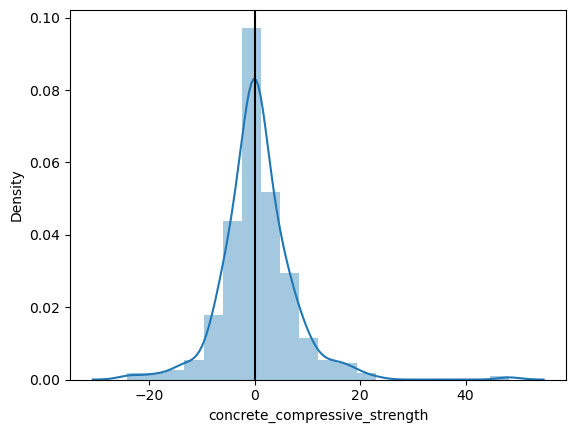

In [21]:
sns.distplot(y_test - y_pred_DT, bins = 20)
plt.axvline(0, color='k')

In [22]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Using Xg boosting Algorithm

import xgboost as xgb

xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train, y_train)

y_pred_XG = xg_reg.predict(X_test)

r2_score_XG = r2_score(y_test, y_pred_XG)

r2_score_XG


0.9212639026410865

In [24]:
# Using adaboost
from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor()

ADA.fit(X_train, y_train)

y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

r2_score_ADA


0.792808916793326